# **ESTATÍSTICA 1 : FREQUÊNCIAS E MEDIDAS**

In [25]:
##Bibliotecas base
import pandas as pd
import numpy as np
###bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
###bibliotecas para estatística
import scipy.stats as stat

**Leitura de dados**

In [26]:
!pip install pydataset --quiet ##instala a biblioteca
from pydataset import data ###biblioteca que contém diversos datasets

Vamos, primeiramente, ler a documentação do dataset que iremos utilizar

In [27]:
data('Forbes2000', show_doc=True)

Forbes2000

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

##  The Forbes 2000 Ranking of the World's Biggest Companies (Year 2004)

### Description

The Forbes 2000 list is a ranking of the world's biggest companies, measured
by sales, profits, assets and market value.

### Usage

    data("Forbes2000")

### Format

A data frame with 2000 observations on the following 8 variables.

rank

the ranking of the company.

name

the name of the company.

country

a factor giving the country the company is situated in.

category

a factor describing the products the company produces.

sales

the amount of sales of the company in billion USD.

profits

the profit of the company in billion USD.

assets

the assets of the company in billion USD.

marketvalue

the market value of the company in billion USD.

### Source

http://www.forbes.com, assessed on November 26th, 2004.

### Examples

    data("Forbes2000", package = "HSAUR")
    summary(Forbes2000)


In [28]:
##leitura do dataset forbes que contém os dados a serem explorados
forbes = data ('Forbes2000')
forbes.head() #lista os 5 primeiros registros

,rank,name,country,category,sales,profits,assets,marketvalue
1,1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
2,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
3,3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87
4,4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
5,5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54


**Tipos de variáveis**

In [29]:
forbes.info() ###verificando quais colunas são numéricas e quais são categóricas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         2000 non-null   int64  
 1   name         2000 non-null   object 
 2   country      2000 non-null   object 
 3   category     2000 non-null   object 
 4   sales        2000 non-null   float64
 5   profits      1995 non-null   float64
 6   assets       2000 non-null   float64
 7   marketvalue  2000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 140.6+ KB


No caso acima, as colunas com type 'object' são categóricas, as cols int64 assumem valores inteiros e as colunas float64 são numéricas contínuas.

# **ANÁLISE DE TENDÊNCIA CENTRAL**

Moda aplicável em todas as variáveis do dataframe
-utilizar a função df.mode()
-No caso vamos retirar as 2 primeiras cols, pois elas assumem valores úncios , são identificadores.

In [30]:
forbes.iloc[:,2:8].mode() #moda considerando todas as linhas das cols 2  a  7

,country,category,sales,profits,assets,marketvalue
0,United States,Banking,0.58,0.13,4.22,1.34


Média e mediana(somente para variáveis numéricas)

In [31]:
forbes[['sales','profits', 'assets', 'marketvalue']].mean()

sales           9.697010
profits         0.381133
assets         34.041850
marketvalue    11.877655
dtype: float64

In [32]:
forbes[['sales','profits', 'assets', 'marketvalue']].median() #comparar media e mediana para verificar existência de outliers

sales          4.365
profits        0.200
assets         9.345
marketvalue    5.150
dtype: float64

A função describe calcula estatísticas descritivas das variaveis numéricas (mais rápida). Nesse caso, temos a média e a mediana representadas pelo percentil 50%

In [33]:
forbes.describe()

,rank,sales,profits,assets,marketvalue
count,2000.000000,2000.000000,1995.000000,2000.000000,2000.000000
mean,1000.500000,9.697010,0.381133,34.041850,11.877655
std,577.494589,18.002592,1.765454,99.678786,24.460197
min,1.000000,0.010000,-25.830000,0.270000,0.020000
25%,500.750000,2.017500,0.080000,4.025000,2.720000
50%,1000.500000,4.365000,0.200000,9.345000,5.150000
75%,1500.250000,9.547500,0.440000,22.792500,10.602500
max,2000.000000,256.330000,20.960000,1264.030000,328.540000


# **ANÁLISE DE DISPERSÃO E OUTLIERS**

Análise de dispersão:
**1- AMPLITUDE, DESVIO PADRÃO E VARIÂNCIA**

In [34]:
### essa função adiciona no describe anterior as cols de amplitude e variância
###a amplitude será o máximo-mínimo valor
###a variância será o desvio padrão ao quadrado
def describe_new(df):
  df1 = df.describe()
  df1.loc['amplitude'] =df1.loc['max'] - df1.loc['min']
  df1.loc['variancia'] = df1.loc['std'] * df1.loc['std']
  return df1

In [35]:
describe_new(forbes)

,rank,sales,profits,assets,marketvalue
count,2000.000000,2000.000000,1995.000000,2000.000000,2000.000000
mean,1000.500000,9.697010,0.381133,34.041850,11.877655
std,577.494589,18.002592,1.765454,99.678786,24.460197
min,1.000000,0.010000,-25.830000,0.270000,0.020000
25%,500.750000,2.017500,0.080000,4.025000,2.720000
50%,1000.500000,4.365000,0.200000,9.345000,5.150000
75%,1500.250000,9.547500,0.440000,22.792500,10.602500
max,2000.000000,256.330000,20.960000,1264.030000,328.540000
amplitude,1999.000000,256.320000,46.790000,1263.760000,328.520000
variancia,333500.000000,324.093331,3.116828,9935.860339,598.301217


A maior amplitude ou discrepância das empresas listadas na forbes 2000, é relacionada aos ativos da empresa, os assets, conforme podemos ver. Essa também é a variável com maior desvio padrão (rank não é considerado por que é a classificação das empresas , funciona como um ID).

# **HISTOGRAMA DAS VARIÁVEIS**

<Figure size 800x1000 with 0 Axes>

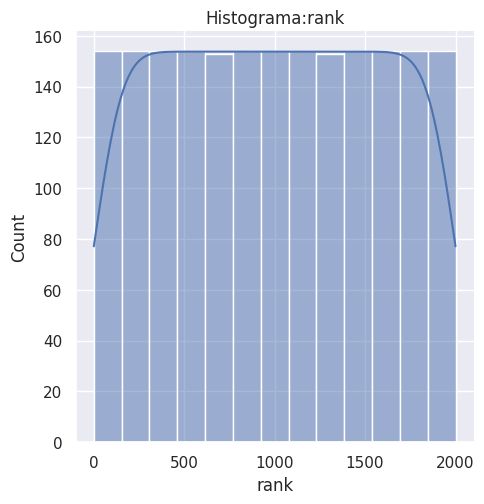

<Figure size 800x1000 with 0 Axes>

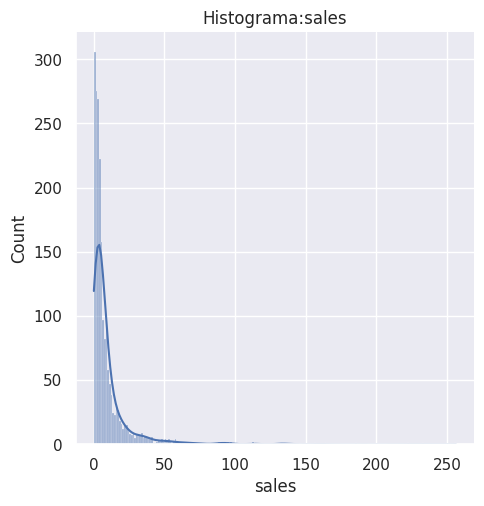

<Figure size 800x1000 with 0 Axes>

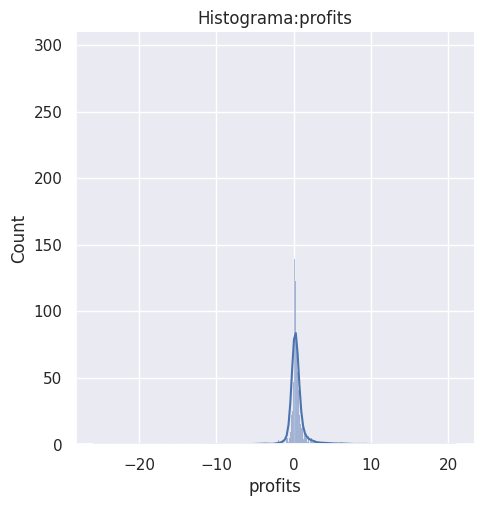

<Figure size 800x1000 with 0 Axes>

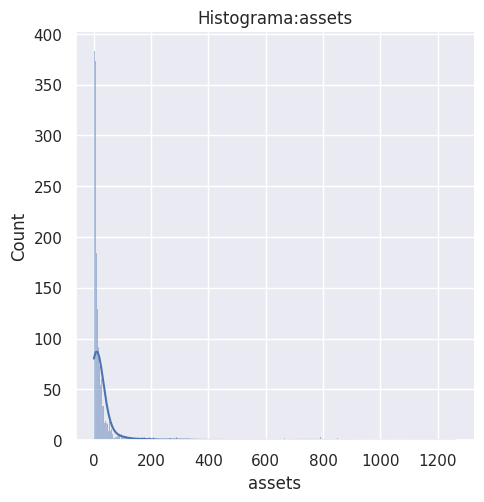

<Figure size 800x1000 with 0 Axes>

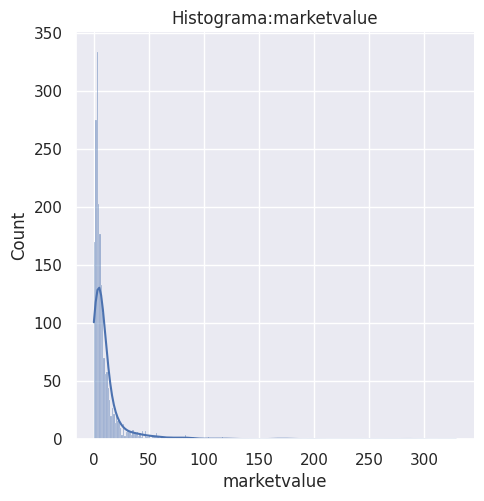

In [36]:
plt.rcParams['figure.figsize'] = [8,10]
sns.set_theme()
#create distplots
for column in forbes.select_dtypes(include=np.number).columns: #cria histogramas para as variáveis numéricas
  plt.figure()
  sns.displot(data=forbes, x = column, kde = True) #kde exibe a curva de densidade
  plt.title('Histograma:' +column)

há funções no python que já geram os histogramas automaticamente

# **BoxPlot**

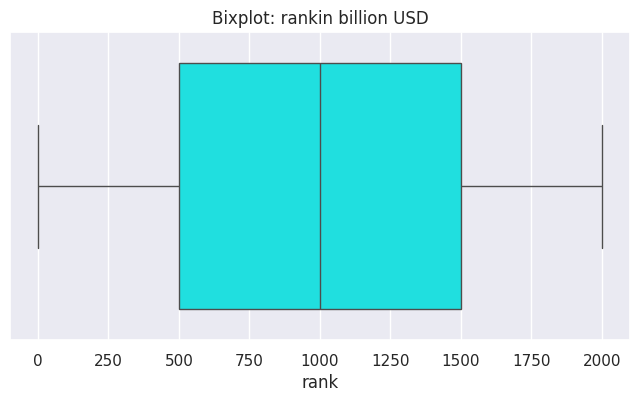

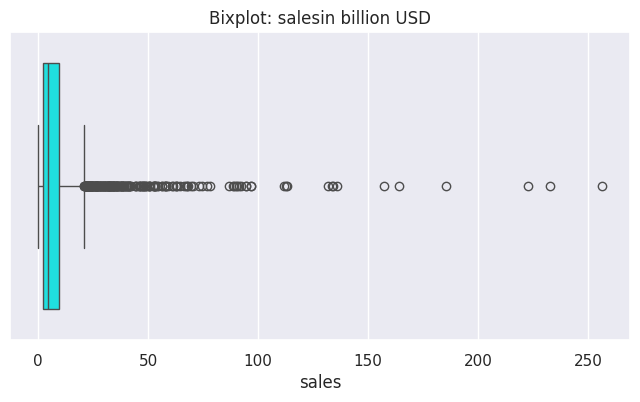

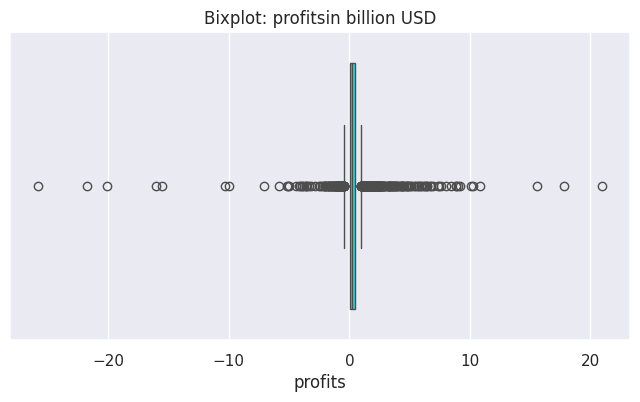

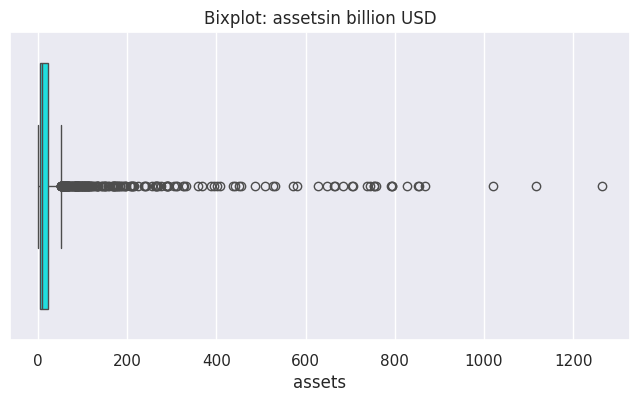

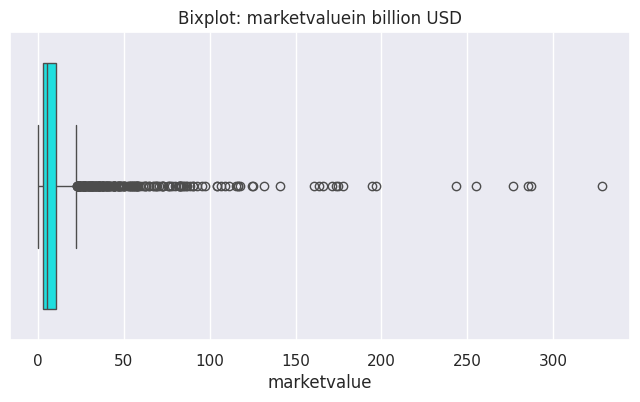

In [37]:
plt.rcParams['figure.figsize'] = [8,4]###para cada uma das cols numéricas roda o boxplot
sns.set_theme()
for column in forbes.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(data=forbes, x = column, color ='cyan', showfliers=True) #showfliers - se exibe ou nao os outliers
    plt.title('Bixplot: ' +column + 'in billion USD')


Nota-se a grande qtidade de outliers expressados pelos pontos nos gráficos de caixa, o que dificulta a visualização de dados. Para realizar boxplots, sem eles, pode-se rodar a mesma função, porem como o parâmetro showfliers = False. Facilitando a análise dos dados.

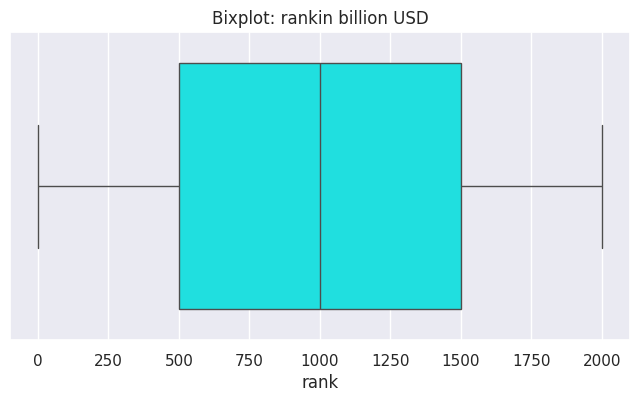

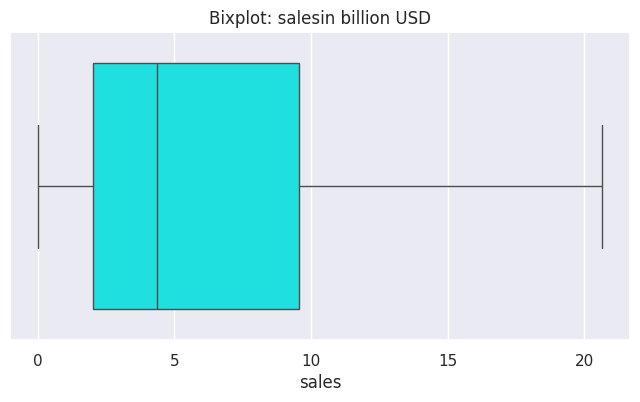

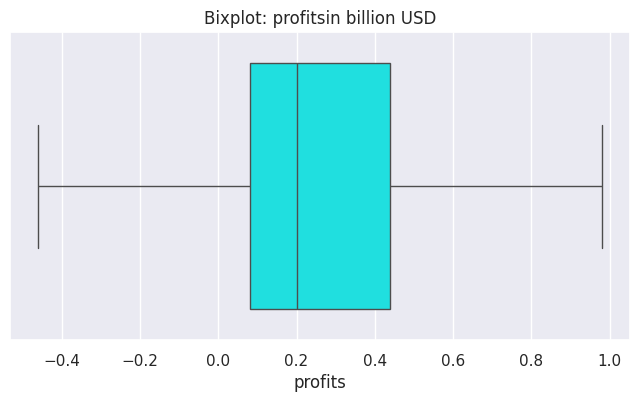

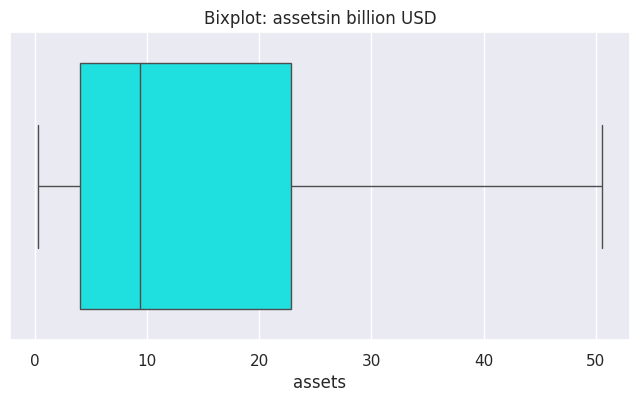

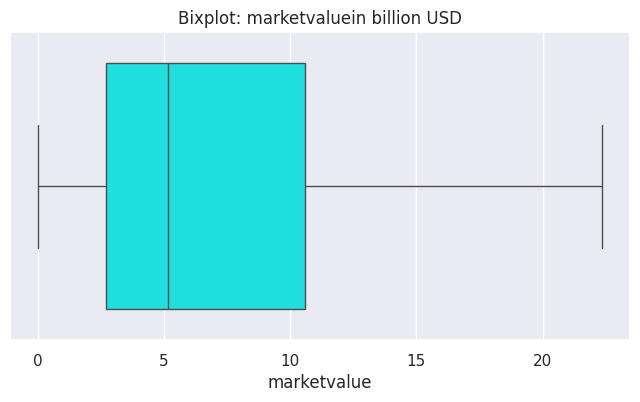

In [38]:
plt.rcParams['figure.figsize'] = [8,4]###para cada uma das cols numéricas roda o boxplot
sns.set_theme()
for column in forbes.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(data=forbes, x = column, color ='cyan', showfliers=False) #showfliers - se exibe ou nao os outliers
    plt.title('Bixplot: ' +column + 'in billion USD')

Pelo boxes, podemos ver a grande concentração de empresas com:
1-vendas próximas a 2-9 bilhões
2-lucro oscilando próximo a 0(0.1 a 0.5 bilhões) com valores positivos e negativos nas caldas.
3- assets9ativos) 5 a 25 bilhões
4- valor de mercado próximo a 3-11 bilhões

# **ANÁLISE DOS OUTLIERS**

**1-MÉTODO DO Z SCORE**
O método z-score utiliza como referência qtos desvios padrões a info está na média. Se z-score >3 , desvios padrões geralmente se pode considerar um outlier.

In [39]:
#precisa do pandas,numpy e do scipy(pacote de estatística) -contém a função z-score
def find_outlier_zscore(dataset,threshold,colname):
  ###função que calcula a quantidade de outliers encontrados dado o nome do dataframe, threshold e o nome da col
  df=dataset[colname]
  outliers = []
  zscore = []
  threshold = threshold
  mean = np.mean(df)
  std = np.std(df)
  for i in df.values:
    z_score = (i-mean)/std
    zscore.append(z_score)
    if np.abs(z_score) > threshold:
      outliers.append(i)
  print('O número de outliers encontrado em {} foi de: ' .format(colname), len(outliers))
  return zscore, outliers

O número de outliers encontrado em rank foi de:  0
O número de outliers encontrado em sales foi de:  35
O número de outliers encontrado em profits foi de:  38
O número de outliers encontrado em assets foi de:  38
O número de outliers encontrado em marketvalue foi de:  36


<Figure size 1000x500 with 0 Axes>

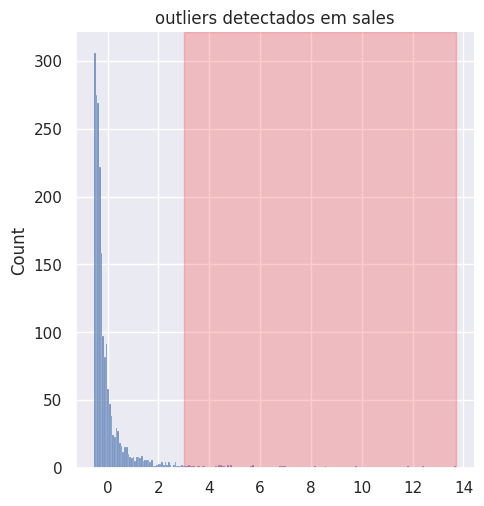

<Figure size 1000x500 with 0 Axes>

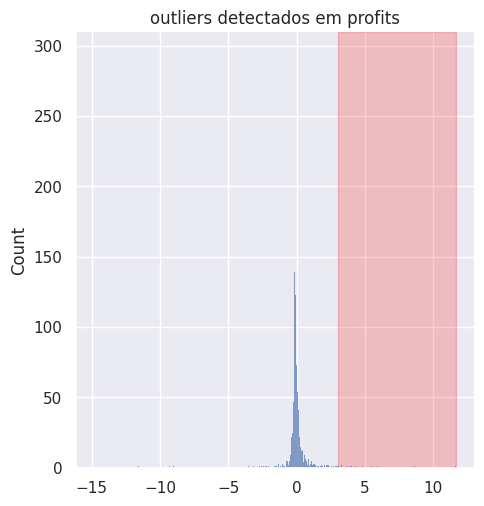

<Figure size 1000x500 with 0 Axes>

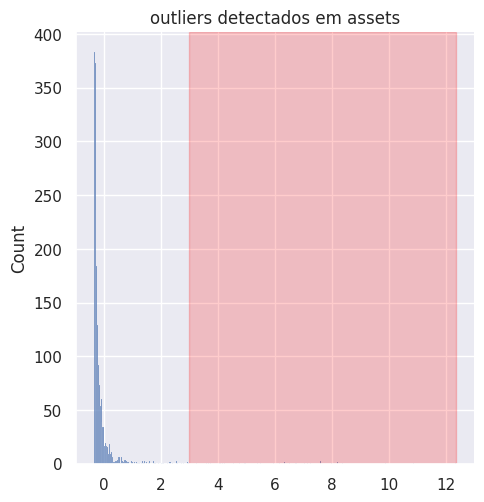

<Figure size 1000x500 with 0 Axes>

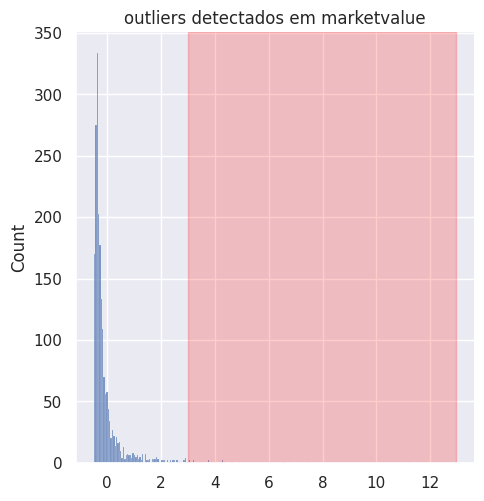

In [42]:
import numpy as np
for column in forbes.select_dtypes(include=np.number).columns:
  zscore,out = find_outlier_zscore(forbes, 3, column)
  if len(out) > 0:
    plt.figure(figsize = (10,5))
    sns.displot(zscore)
    plt.axvspan(xmin = 3,xmax =max(zscore),alpha=0.2, color ='red')
    plt.title('outliers detectados em {}'.format(column))

pelo gra´fico acima fica mais fácil visualizar os valores outliers para cada nível de z-score. Vemos que para z-score =3, valores considerados outliers estão nas caldas dos histogramas, em vermelho.

# **REMOVENDO OUTLIERS COM O MÉTODO Z-SCORE**


1-REPLACE OUTLIERS WITH MEAN

In [44]:
def replace_na_outlier_zscore(dataset, threshold, colname):
  ###função que faz um replace para NAN (valor nulo)caso seja encontrado um outlier
  df=dataset[colname]
  outliers = []
  zscore = []
  val = []
  threshold = threshold
  mean = np.mean(df)
  std = np.std(df)
  for i in df.values:
    z_score = (i- mean)/std
    zscore.append(z_score)
    if np.abs(z_score) > threshold:
      outliers.append(i)
      val.append(np.nan)
    else:
      val.append(i)
  return val



In [45]:
def drop_outliers(dataset, threshold):
  ###vamos utilizar a função drop NA para remover outliers
  for column in dataset.select_dtypes(include=np.number).columns:
    dataset[column] =  replace_na_outlier_zscore(dataset,3 ,column)
  return dataset.dropna()


In [53]:
def replace_median_outliers(dataset, threshold):
  ###vamos utilizar a função fillna para trocar os NANs pela medianas
  for column in dataset.select_dtypes(include=np.number).columns:
    dataset[column] =  replace_na_outlier_zscore(dataset,3 ,column)
  return dataset.fillna(dataset.median())

In [54]:
forbes_zscore_na = drop_outliers(forbes,3)

In [55]:
forbes_zscore_median = replace_median_outliers(forbes,3)

<ipython-input-53-45e33021900f>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return dataset.fillna(dataset.median())


In [56]:
forbes_zscore_median

,rank,name,country,category,sales,profits,assets,marketvalue
1,1,Citigroup,United States,Banking,3.85,0.19,7.885,4.49
2,2,General Electric,United States,Conglomerates,3.85,0.19,7.885,4.49
3,3,American Intl Group,United States,Insurance,3.85,0.19,7.885,4.49
4,4,ExxonMobil,United States,Oil & gas operations,3.85,0.19,7.885,4.49
5,5,BP,United Kingdom,Oil & gas operations,3.85,0.19,7.885,4.49
...,...,...,...,...,...,...,...,...
1996,1996,Siam City Bank,Thailand,Banking,0.48,0.02,11.270,1.47
1997,1997,Yokogawa Electric,Japan,Business services & supplies,2.78,-0.22,2.960,3.29
1998,1998,Hindalco Industries,India,Materials,1.35,0.14,2.470,2.76
1999,1999,Nexans,France,Capital goods,5.09,0.00,2.710,0.88


# **2-Método do IQR**

O método IQR (distância inter-quartil em inglês) vê a distãncia da amplitude dos quartis

In [57]:
forbes = data('Forbes2000')

In [58]:
def find_outlier_iqr(dataset, colname):
  q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
  #calcula IQR
  iqr = q75 - q25
  #calcula outlier cutoff
  cut_off = iqr * 1.5
  #calcula margens inferiores, lower e superiores upper
  lower, upper = q25 - cut_off, q75 + cut_off
  print('IQR é ', iqr)
  #print('valor mínimo', lower)
  #print('valor máximo', upper)
  outliers = []


  for i in dataset[colname].values:
    if((i > upper) or (i < lower)):
      outliers.append(i)
  print('o numero de outliers encontrado foi de', len(outliers))
  return lower, upper, outliers

IQR é  999.5
o numero de outliers encontrado foi de 0
IQR é  7.529999999999999
o numero de outliers encontrado foi de 212
IQR é  nan
o numero de outliers encontrado foi de 0
IQR é  18.7675
o numero de outliers encontrado foi de 222
IQR é  7.8824999999999985
o numero de outliers encontrado foi de 217


<Figure size 1000x600 with 0 Axes>

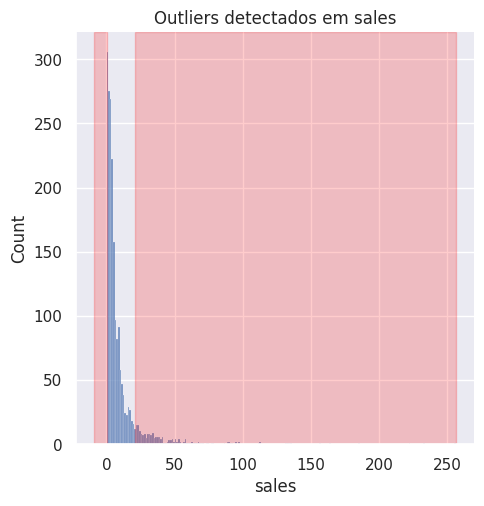

<Figure size 1000x600 with 0 Axes>

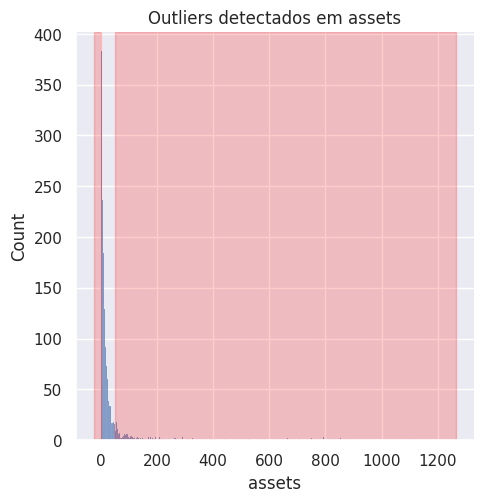

<Figure size 1000x600 with 0 Axes>

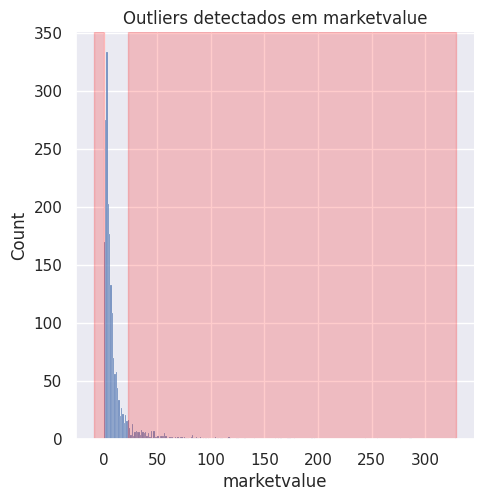

In [59]:
for column in forbes.select_dtypes(include = np.number).columns:
  lower, upper, out = find_outlier_iqr(forbes, column)
  if (len(out) > 0):
    plt.figure(figsize = (10,6))
    sns.displot(forbes[column],kde = False)
    plt.axvspan(xmin = lower,xmax = forbes[column].min(), alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax = forbes[column].max(), alpha=0.2, color='red')
    plt.title('Outliers detectados em {}' .format(column))

# **ANÁLISE DE MISSING VALUES (DADOS FALTANTES)**

1-vamos verificar a soma de dados faltantes para dada uma das cols do dataframe:

In [60]:
#forbes.isna()  só aparce falses e trues
forbes.isna().sum()

rank           0
name           0
country        0
category       0
sales          0
profits        5
assets         0
marketvalue    0
dtype: int64

In [61]:
import missingno as msno #pacote com visualizações de dados faltantes

<Axes: >

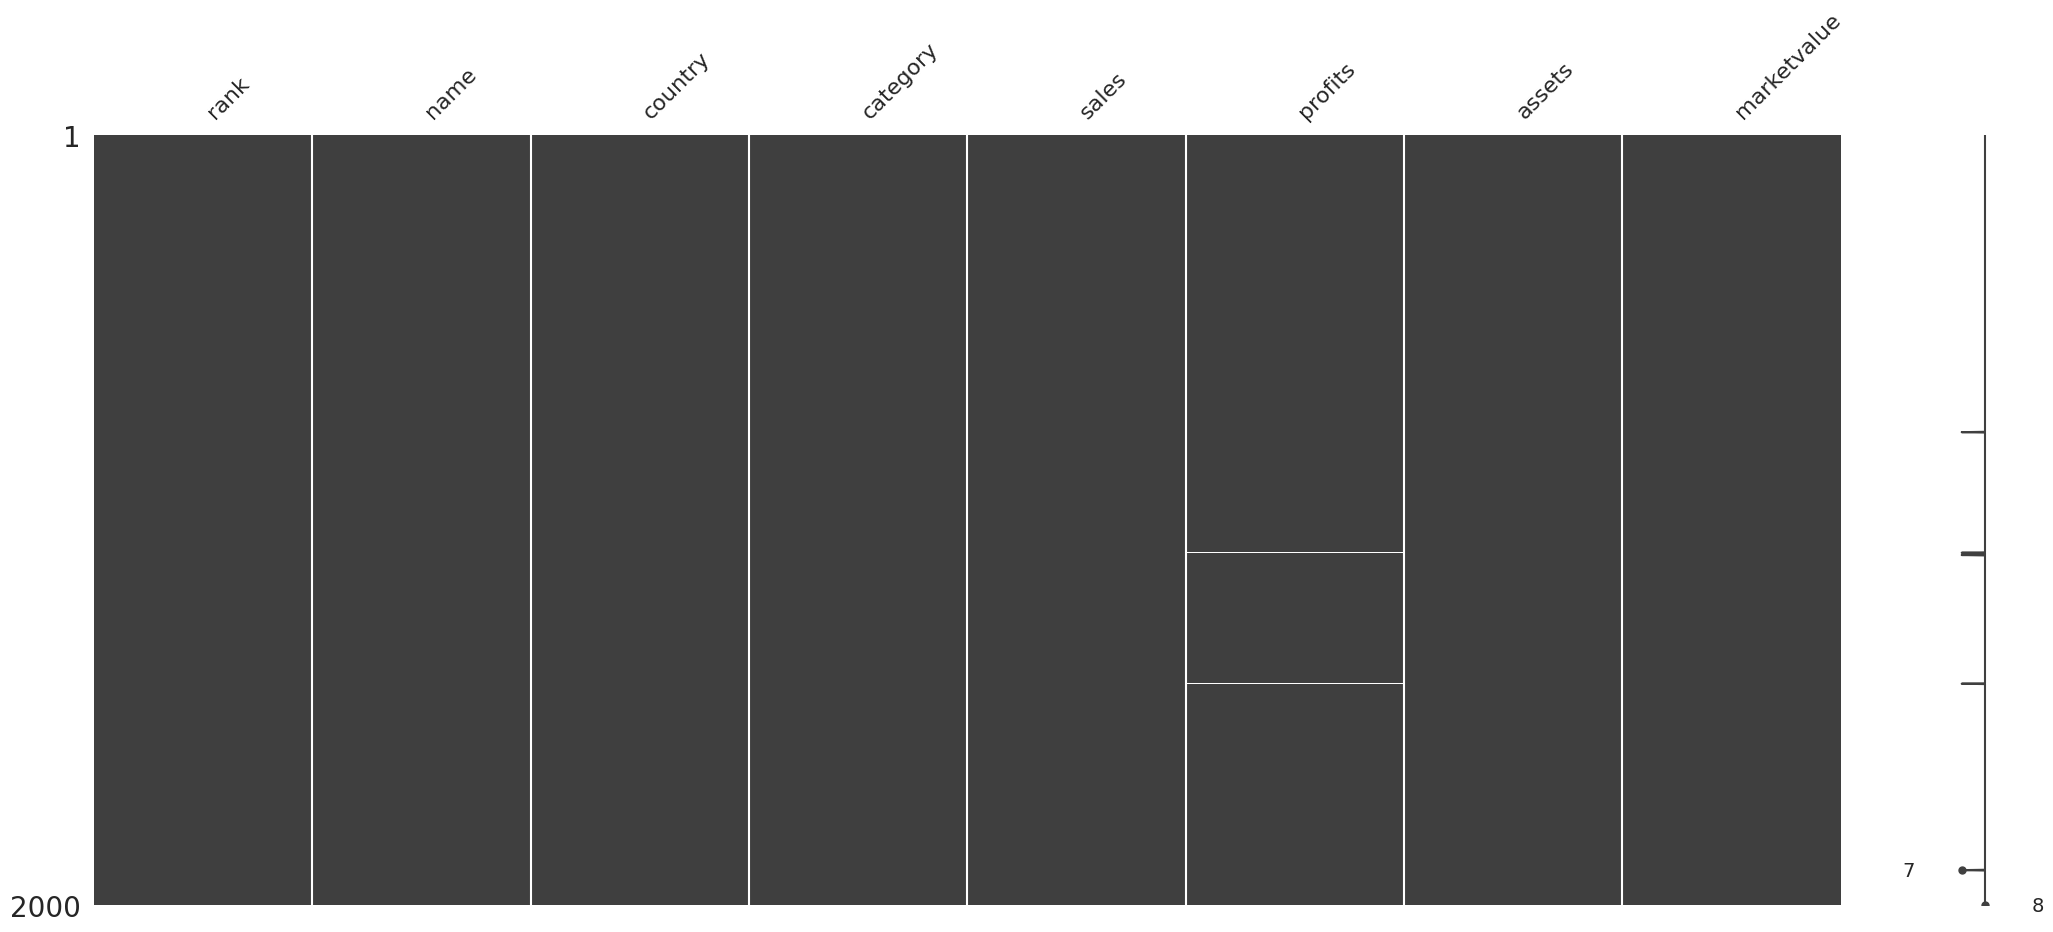

In [62]:
msno.matrix(forbes)  #essa visualização nos dá uma ideia da completude dos dados faltantes, no caso aparece em profits(lucro), é o branco na col

Atenção: isna() é o mesmo que isnull(), no pandas



In [77]:
###vamos construir uma tabela com o % de valores faltantes de cada variável abaixo
missing  = forbes.isna().sum()
missing_perc = 100 * forbes.isna().sum()/len(forbes)

mis_val_table  = pd.concat([missing,missing_perc], axis = 1)

mis_val_table = mis_val_table.rename(columns = {0:'# Count: valores nulos', 1: '% do Total'})


mis_val_table= mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values('% do Total', ascending = False).round(1)


print('O dataframe contém ' + str(forbes.shape[1]) + ' colunas.\n'
        'contendo' + str(mis_val_table.shape[0]) +
        ' colunas com valores faltantes.')


mis_val_table

O dataframe contém 8 colunas.
contendo1 colunas com valores faltantes.


,# Count: valores nulos,% do Total
profits,5,0.2


# **EDA AUTOMATIZADA**

Existem 2 pacote famosos no mundo da análise de dados que fazem análises exploratórias automatizadas:
1- pandas profiling - chamado atualmente de ydataprofiling
2-Sweetviz
Ambas geram relatórios html prontos para análises / interpretações do analista

In [81]:
!pip install sweetviz  --quiet

In [84]:
import sweetviz as sv
my_report   = sv.analyze(forbes) #lê os dados e cria uma report

                                             |          | [  0%]   00:00 -> (? left)


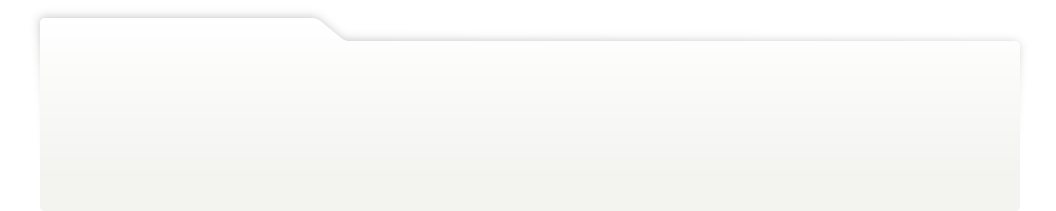
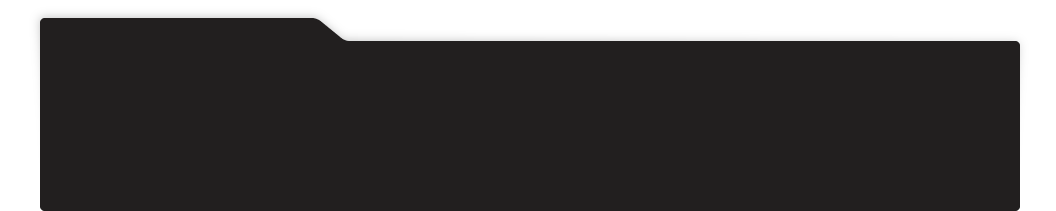
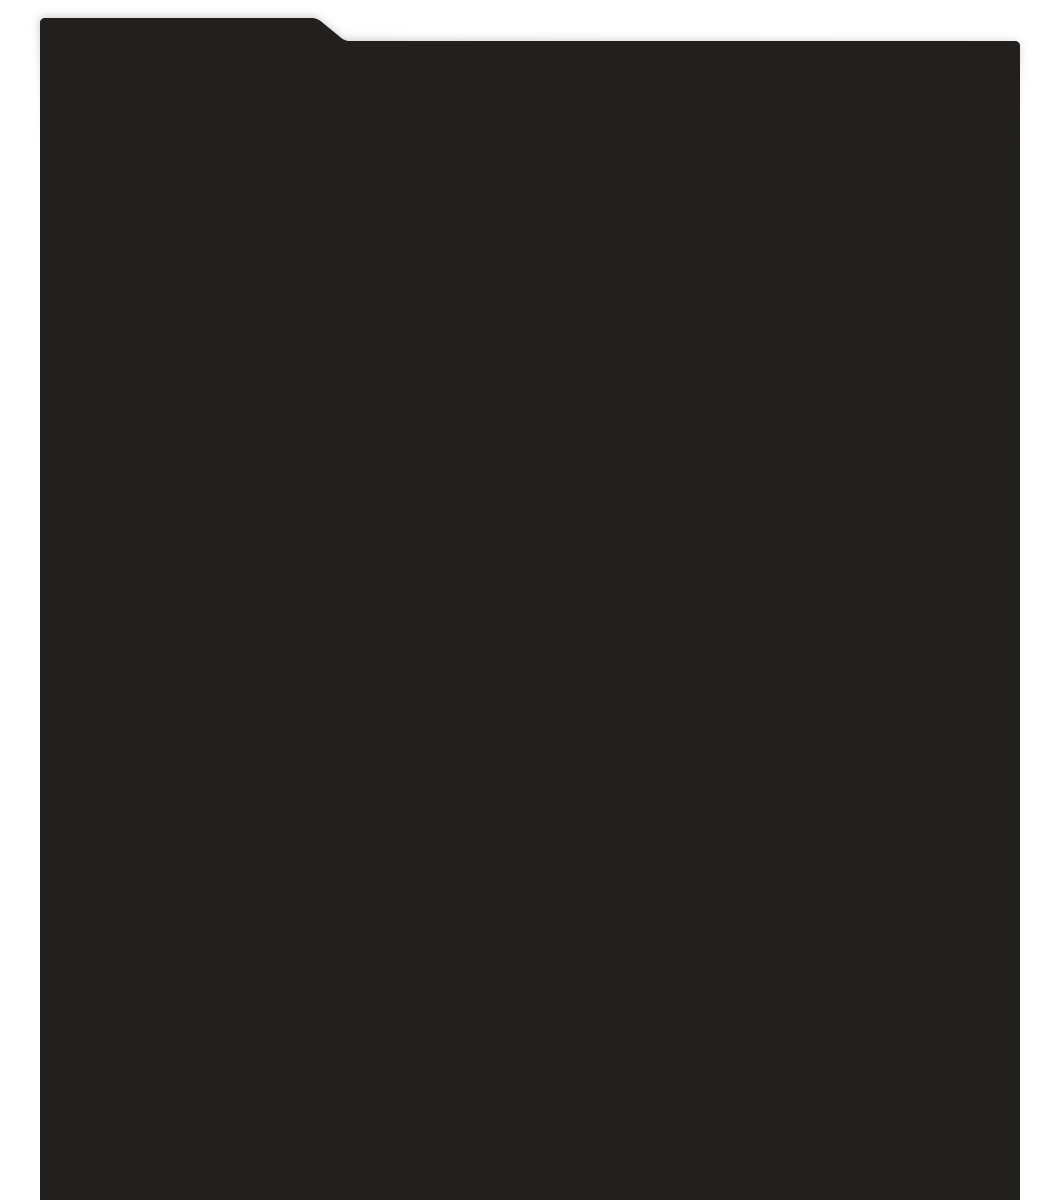
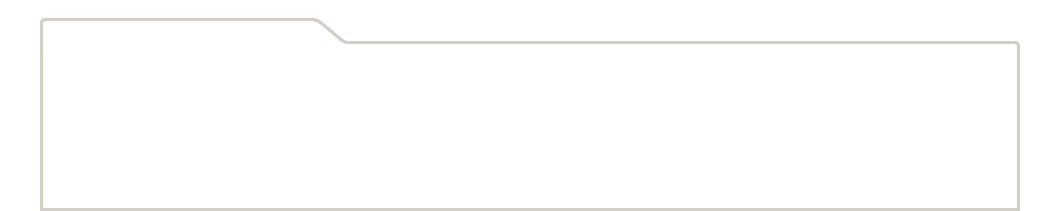
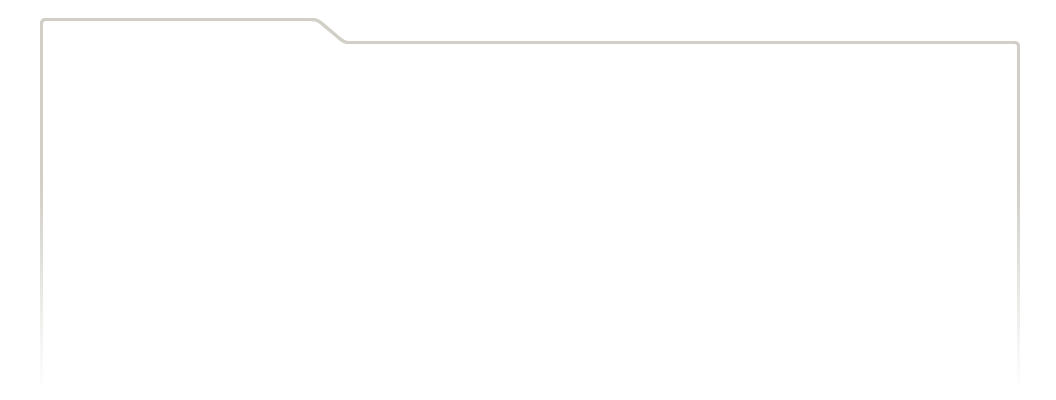
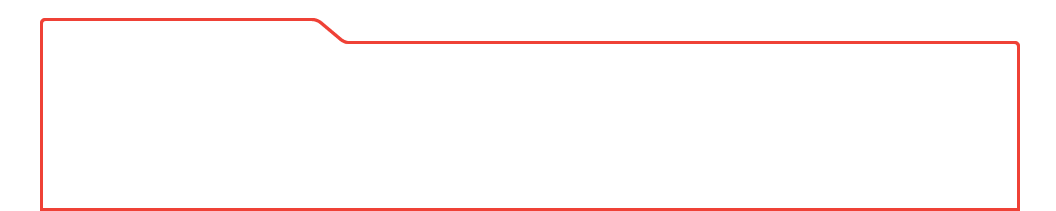
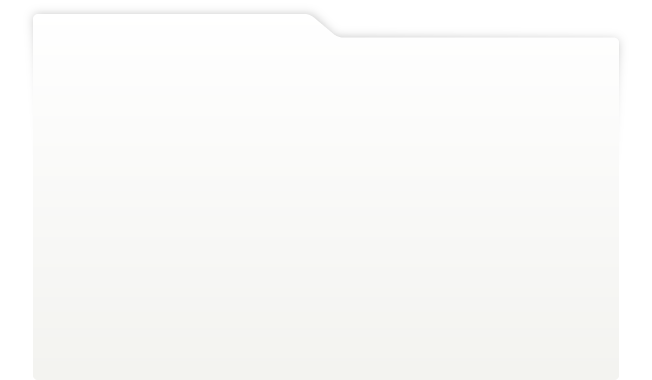
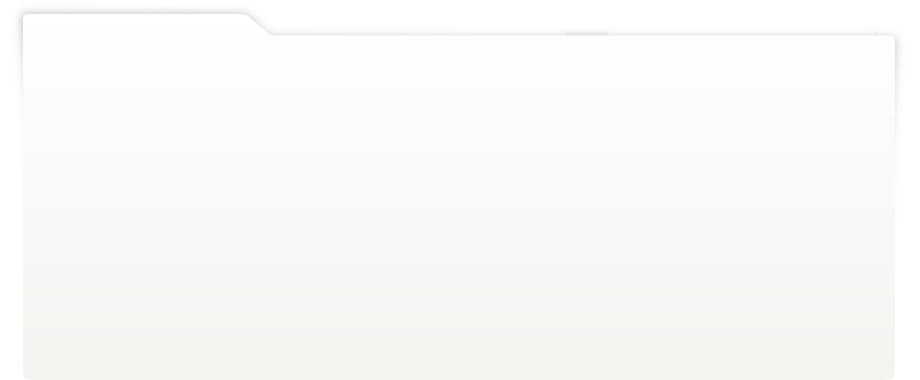
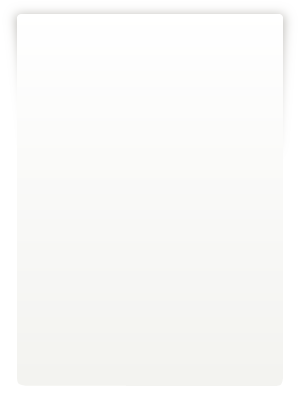
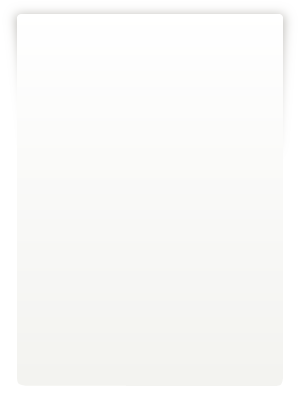
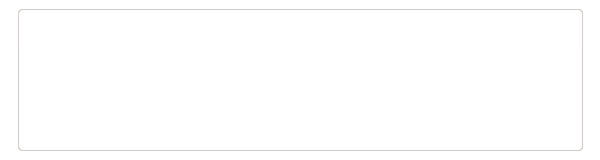
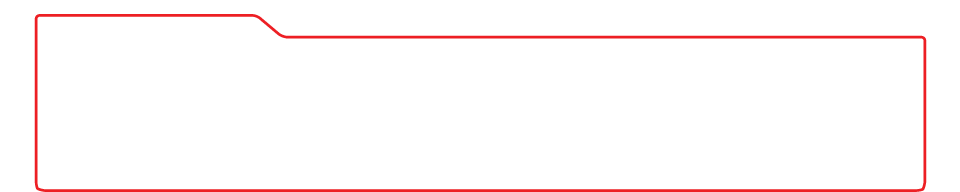
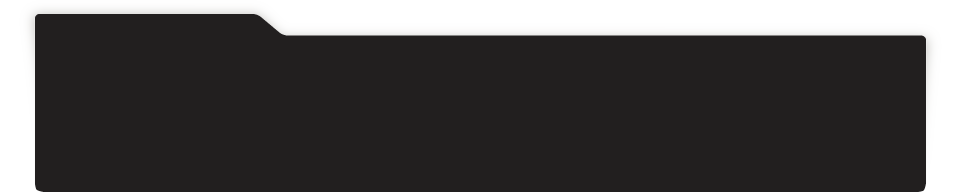
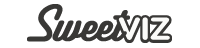
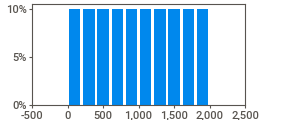
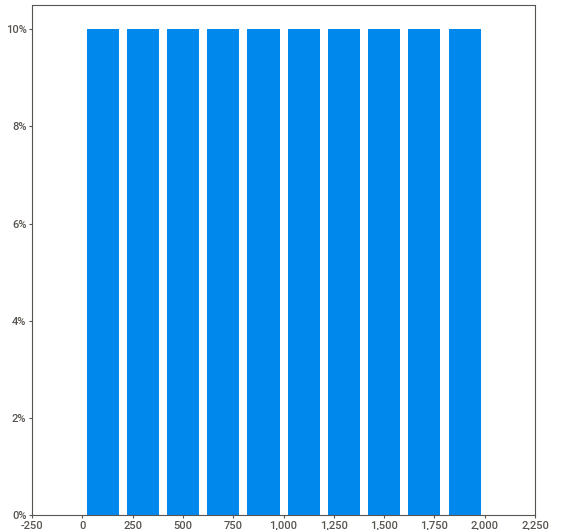
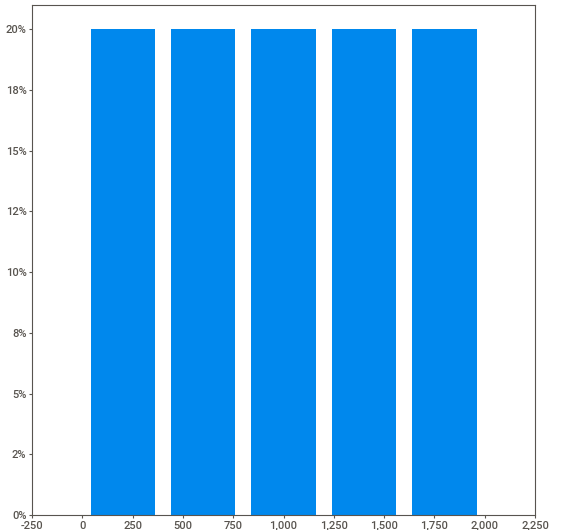
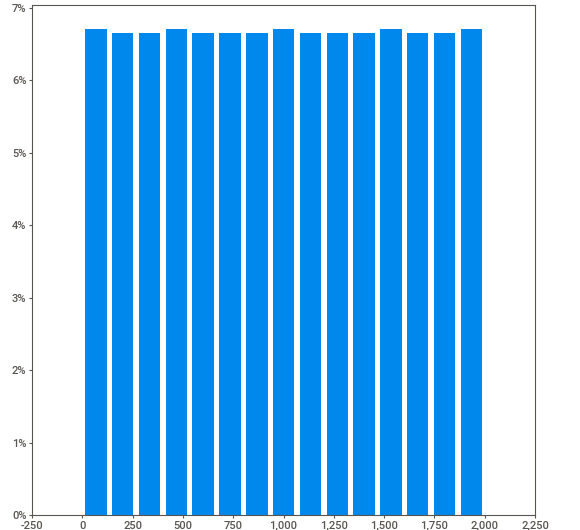
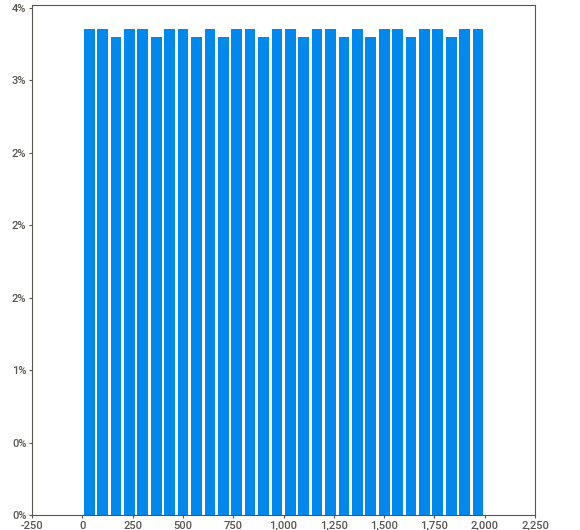
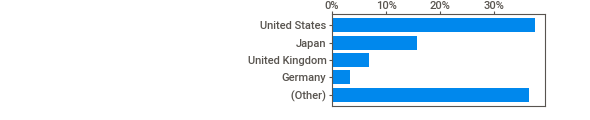
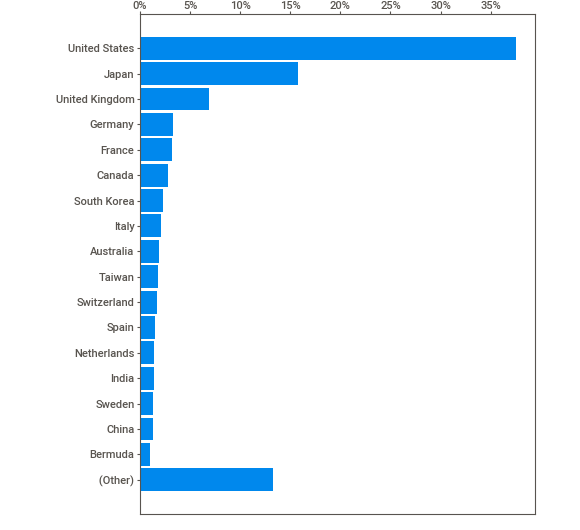
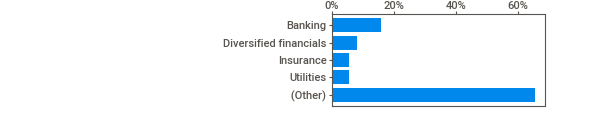
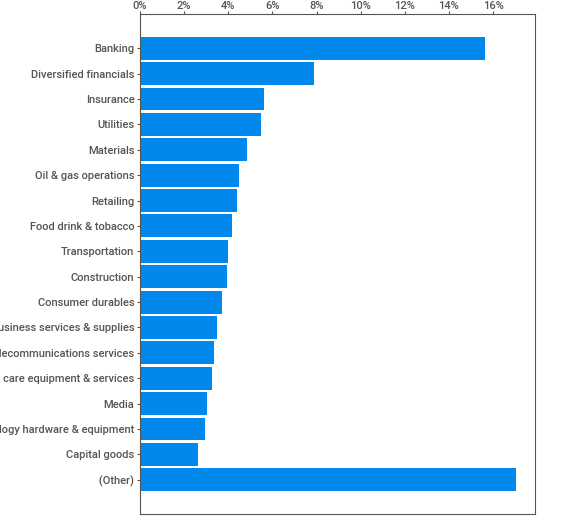
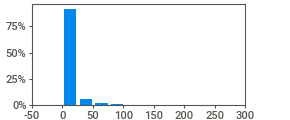
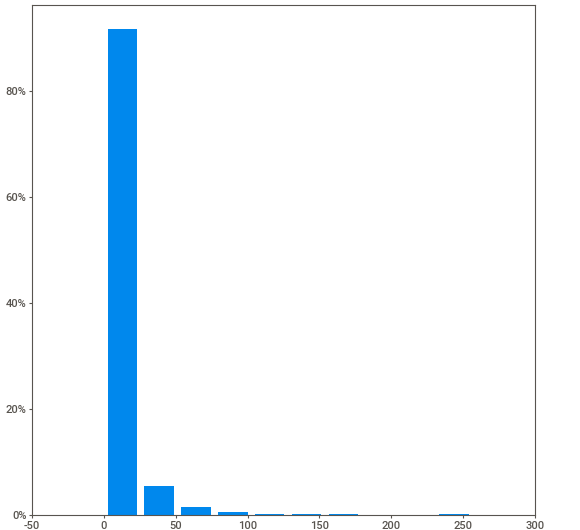
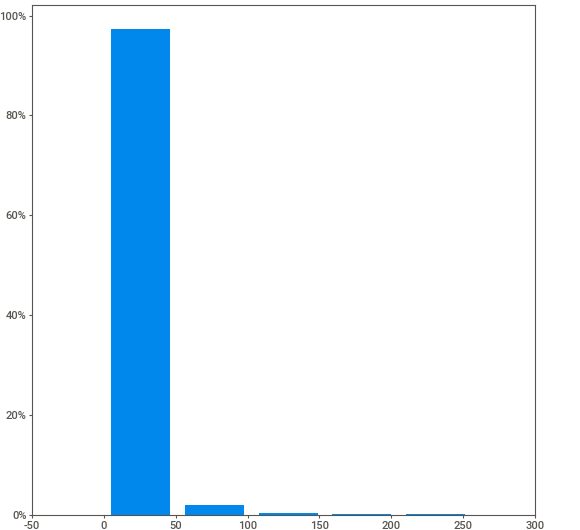
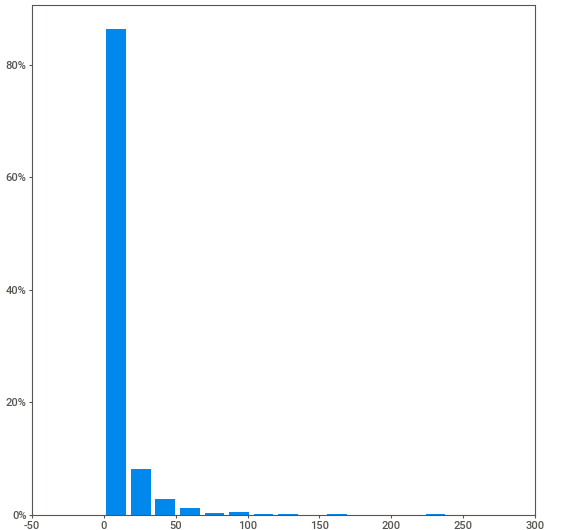
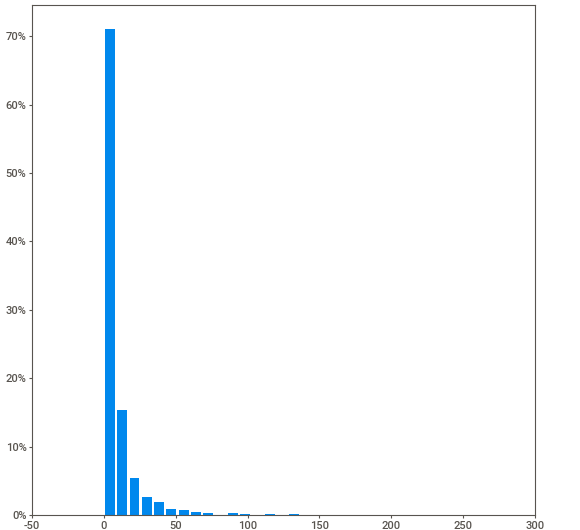
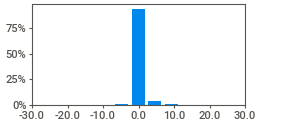
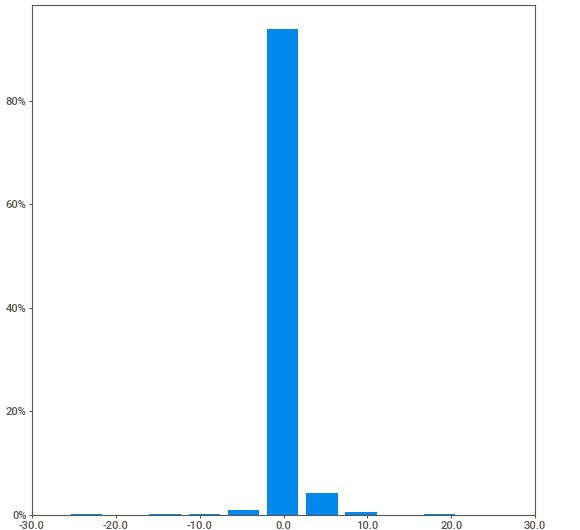
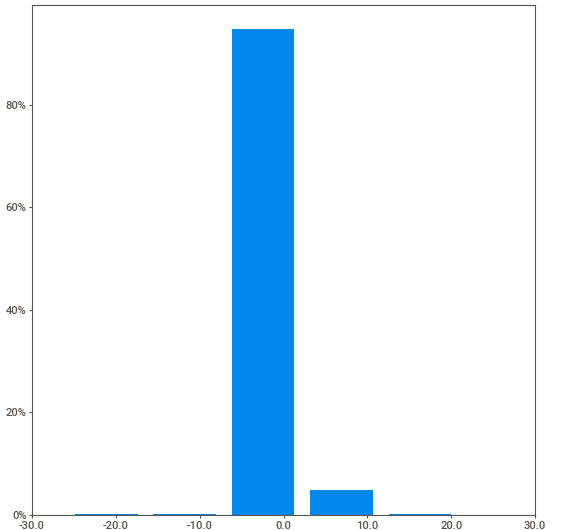
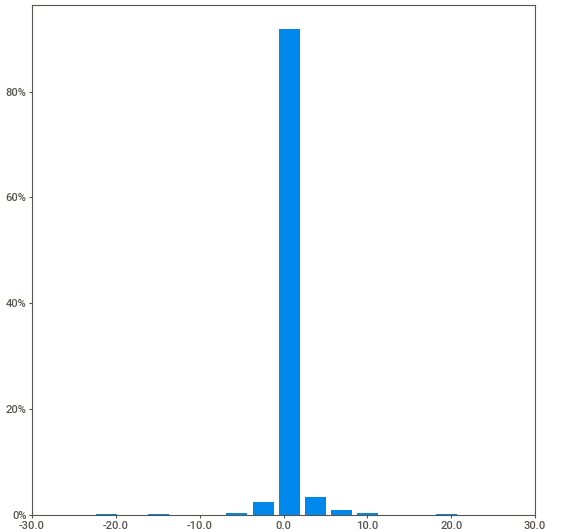
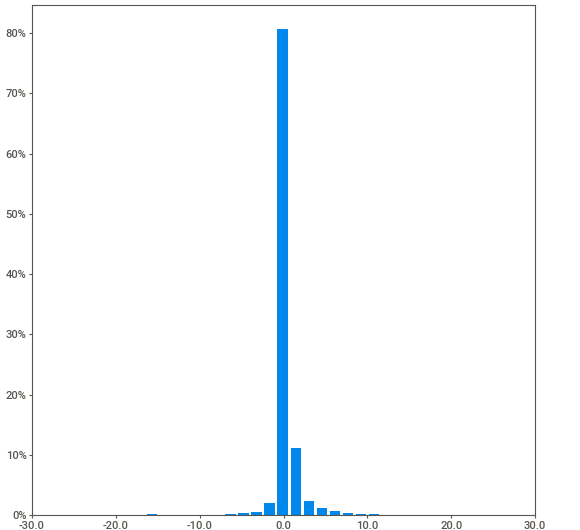
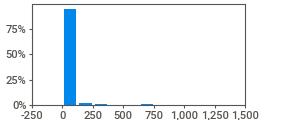
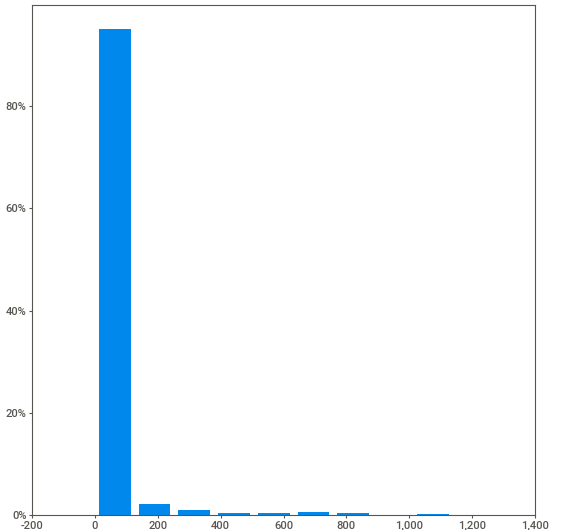
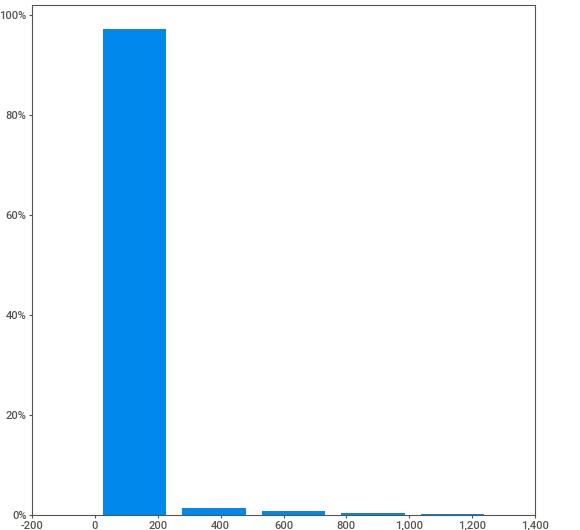
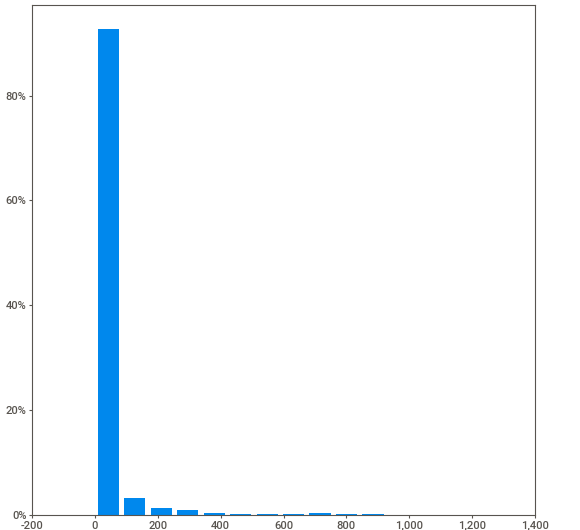
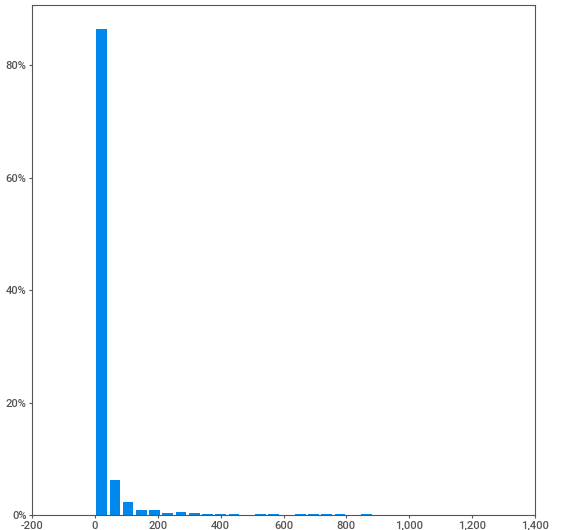
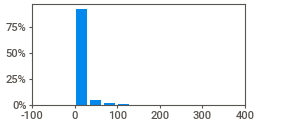
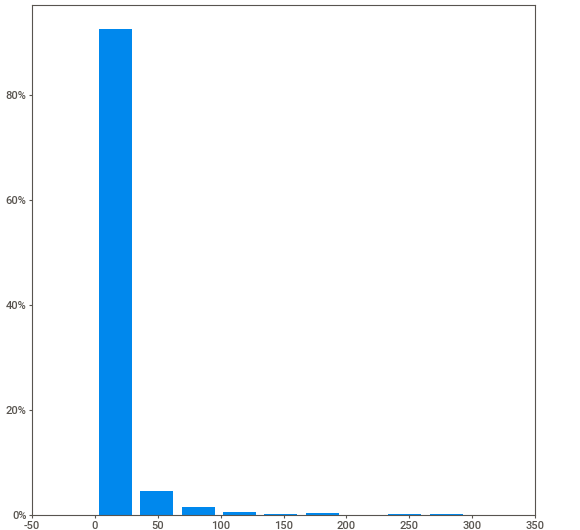
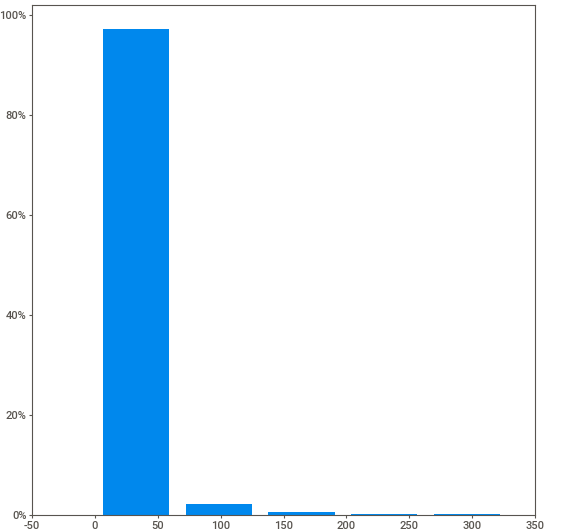
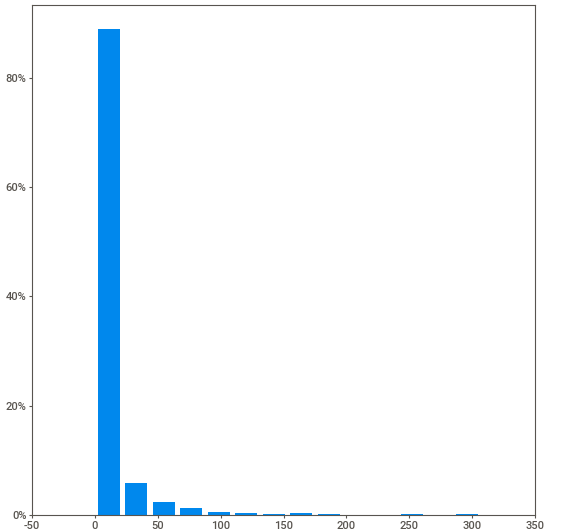
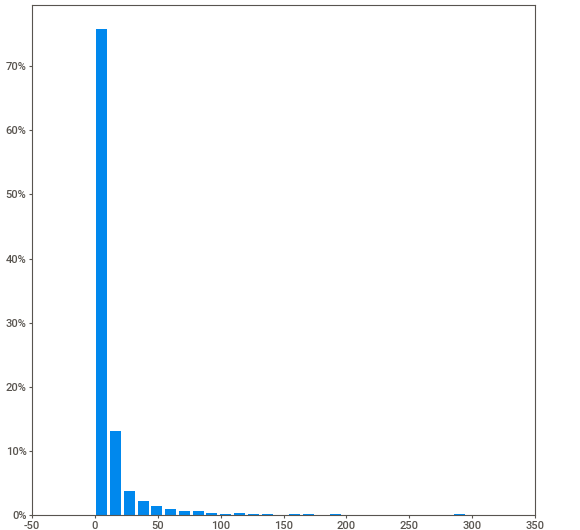
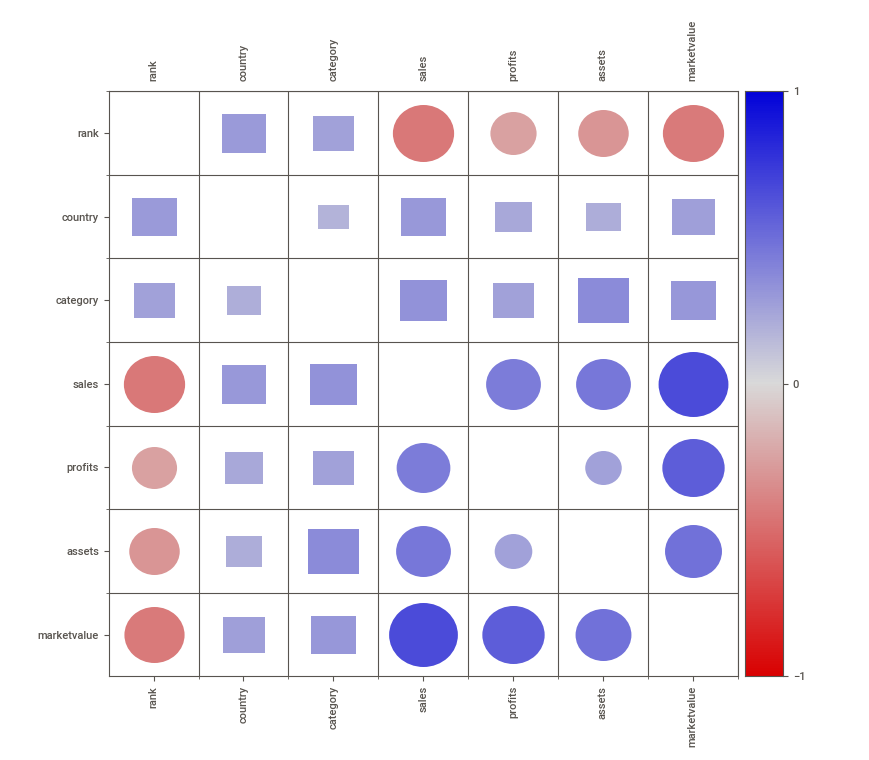
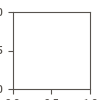

In [85]:
my_report.show_notebook() ### para ver o html dos graficos gerados no próprio notebook, resume dados

In [86]:
my_report.show_html(filepath='./SWEETVIZ_REPORT.html',
                    open_browser =True,
                    layout='widescreen',
                    scale=None)
###gera o html e salva no seu diretório local

Report ./SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
